In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram

# Feature engineering

In [2]:
btc_price_data_1_year = pd.read_csv("data/bitcoin_historical_data_1_year.csv")
btc_price_data_1_year.timestamp = pd.to_datetime(btc_price_data_1_year.timestamp)
btc_price_data_1_year.date = pd.to_datetime(btc_price_data_1_year.date)
btc_price_data_1_year

,timestamp,open,high,low,close,volume,date,time
0,2023-11-01 00:00:00,34618.86,34676.51,34656.38,34667.88,48.953000,2023-11-01,00:00:00
1,2023-11-01 00:01:00,34642.54,34687.53,34673.30,34642.82,16.178075,2023-11-01,00:01:00
2,2023-11-01 00:02:00,34637.97,34656.82,34642.53,34656.56,8.753120,2023-11-01,00:02:00
3,2023-11-01 00:03:00,34617.22,34656.56,34656.56,34629.34,11.308610,2023-11-01,00:03:00
4,2023-11-01 00:04:00,34597.99,34630.42,34629.41,34622.27,8.583808,2023-11-01,00:04:00
...,...,...,...,...,...,...,...,...
528627,2024-10-31 23:56:00,70238.76,70248.97,70248.97,70238.76,1.189134,2024-10-31,23:56:00
528628,2024-10-31 23:57:00,70218.00,70250.00,70238.77,70233.24,4.767082,2024-10-31,23:57:00
528629,2024-10-31 23:58:00,70193.97,70242.25,70232.55,70207.78,9.589688,2024-10-31,23:58:00
528630,2024-10-31 23:59:00,70175.16,70207.79,70207.79,70197.83,7.112237,2024-10-31,23:59:00


In [3]:
btc_price_data_1_year.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'date', 'time'], dtype='object')

#### 1. STL 

#### **TODO: we don't need the STL !!!**

Good for visualisations, but it's performance it not so good

In [4]:
STL(btc_price_data_1_year.close, period = 24).config

{'period': 24,
 'seasonal': 7,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 47,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 25,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

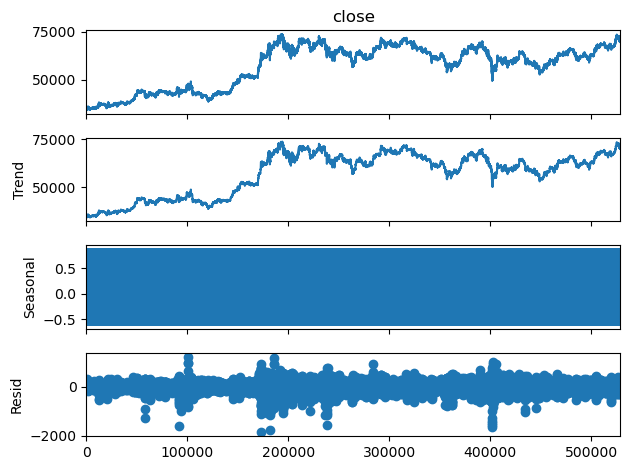

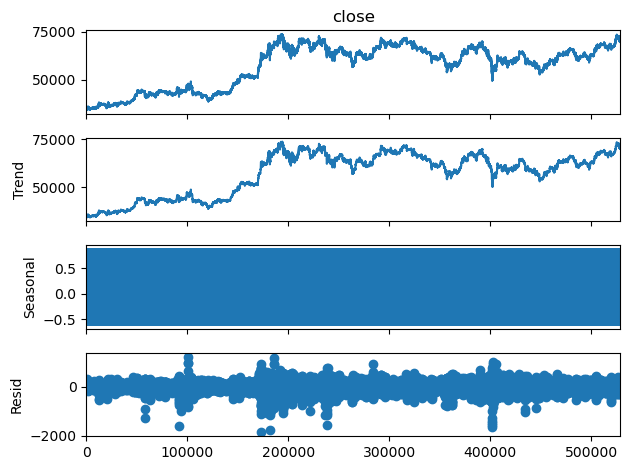

In [5]:
seasonal_decompose(btc_price_data_1_year.close, period = 24).plot()

In [6]:
seasonal_decompose(btc_price_data_1_year.close, period = 24).trend.head(20)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12    34618.809792
13    34614.828125
14    34610.411250
15    34606.173542
16    34603.065833
17    34600.824792
18    34598.620417
19    34595.091667
Name: trend, dtype: float64

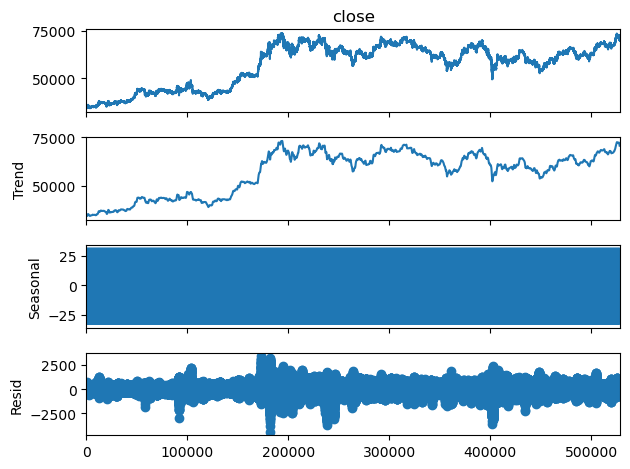

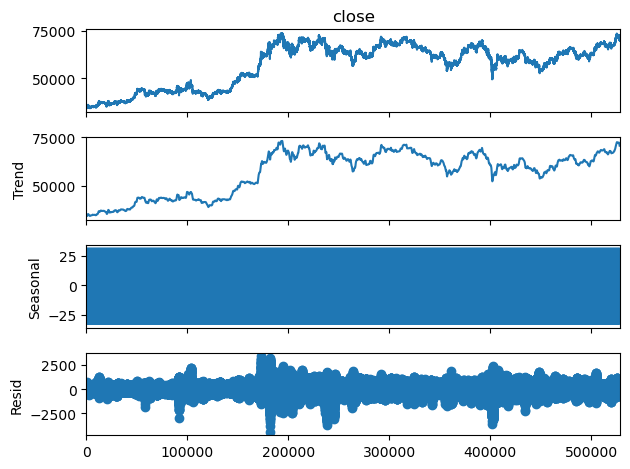

In [7]:
# 24h * 30 Days
seasonal_decompose(btc_price_data_1_year.close, period = 24 * 30).plot()

In [8]:
seasonal_decompose(btc_price_data_1_year.close, period = 24 * 30).trend.head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: trend, dtype: float64

#### 1. Fourier Analysis

In [9]:
frequencies, power = periodogram(btc_price_data_1_year.close, fs = len(btc_price_data_1_year))
# frequencies, power = periodogram(x, fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)


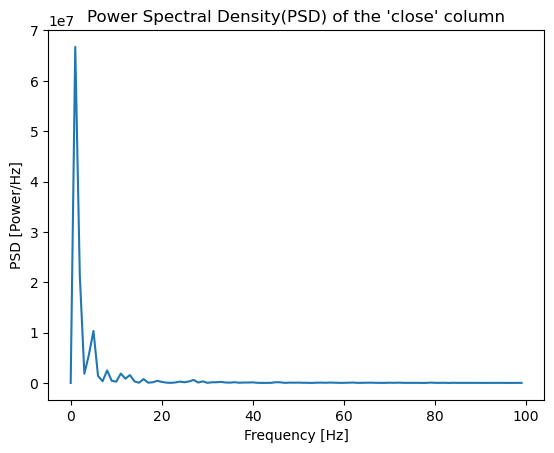

In [10]:
# plt.plot(frequencies, power)
# plt.plot(1/frequencies[1:10000], power[1:10000])
plt.plot(frequencies[:100], power[:100])
# plt.semilogy(frequencies, power)

plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [Power/Hz]")
plt.title("Power Spectral Density(PSD) of the 'close' column")
plt.show()

**TODO** interpret the results from the chart

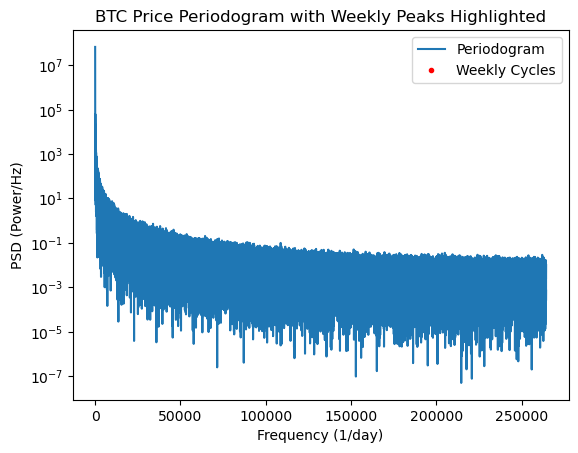

In [11]:
import numpy as np

# Convert frequency to periods in days
f, Pxx = frequencies[1:], power[1:]

periods = 1 * 24 / f
weekly_period = (periods > 6 * 24) & (periods < 8 * 24)  # Focus on weekly cycles

# Highlight weekly cycles
plt.semilogy(f, Pxx, label='Periodogram')
plt.semilogy(f[weekly_period], Pxx[weekly_period], 'r.', label='Weekly Cycles')
plt.title('BTC Price Periodogram with Weekly Peaks Highlighted')
plt.xlabel('Frequency (1/day)')
plt.ylabel('PSD (Power/Hz)')
plt.legend()
plt.show()


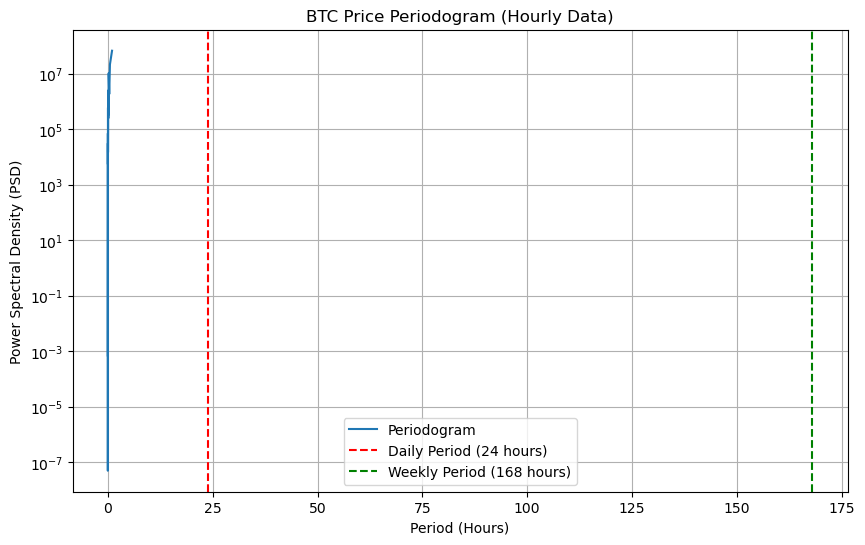

In [12]:
import numpy as np
from scipy.signal import periodogram
import matplotlib.pyplot as plt

# Example hourly BTC closing prices (replace with actual data)
# Assume `btc_hourly['close']` contains the closing prices.
# fs = 1  # Sampling frequency is 1/hour
fs = len(btc_price_data_1_year)  # Sampling frequency is 1/hour

# Compute periodogram
f, Pxx = periodogram(btc_price_data_1_year['close'], fs)

f, Pxx = f[1:], Pxx[1:]

# Convert frequency to periods (in hours and days)
period_hours = 1 / f
period_days = period_hours / 24

# Plot Periodogram
plt.figure(figsize=(10, 6))
plt.semilogy(period_hours, Pxx, label='Periodogram')
plt.axvline(x=24, color='r', linestyle='--', label='Daily Period (24 hours)')
plt.axvline(x=168, color='g', linestyle='--', label='Weekly Period (168 hours)')
plt.title('BTC Price Periodogram (Hourly Data)')
plt.xlabel('Period (Hours)')
plt.ylabel('Power Spectral Density (PSD)')
plt.legend()
plt.grid()
plt.show()


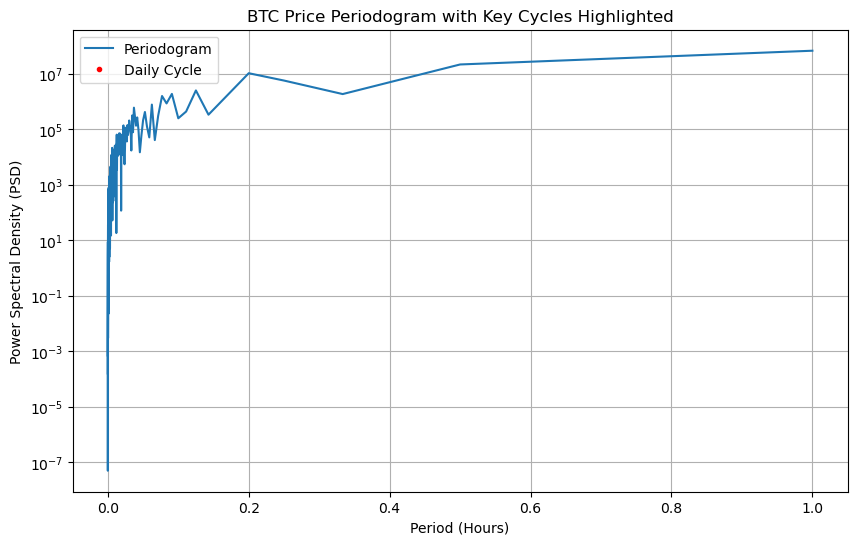

In [13]:
# Highlight daily and weekly periods
daily_period = (period_hours > 20) & (period_hours < 28)  # Around 24 hours
weekly_period = (period_hours > 160) & (period_hours < 176)  # Around 168 hours

plt.figure(figsize=(10, 6))
plt.semilogy(period_hours, Pxx, label='Periodogram')
plt.semilogy(period_hours[daily_period], Pxx[daily_period], 'r.', label='Daily Cycle')
# plt.semilogy(period_hours[weekly_period], Pxx[weekly_period], 'g.', label='Weekly Cycle')
plt.title('BTC Price Periodogram with Key Cycles Highlighted')
plt.xlabel('Period (Hours)')
plt.ylabel('Power Spectral Density (PSD)')
plt.legend()
plt.grid()
plt.show()


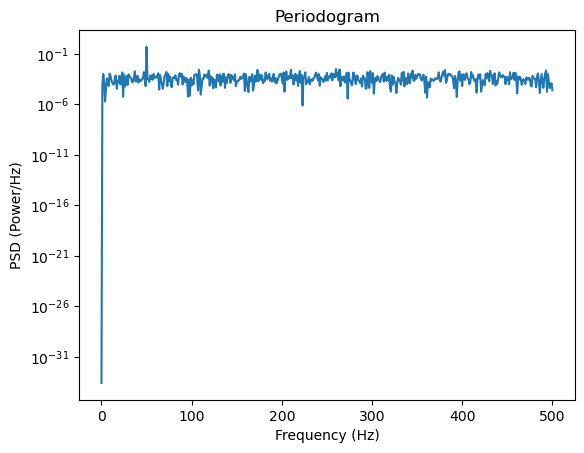

In [14]:
import numpy as np
from scipy.signal import periodogram
import matplotlib.pyplot as plt

# Example signal: sine wave + noise
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.normal(size=t.shape)

# Compute periodogram
f, Pxx = periodogram(x, fs)

# Plot
plt.semilogy(f, Pxx)
plt.title('Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (Power/Hz)')
plt.show()


#### 2. Autocorrelation: the value at time 𝑡 is correlated with other values (e.g., at 𝑡 − 1)

In [15]:
# # ACF plot
# plot_acf(btc_price_data_1_year['close'], lags=4)
# plt.show()

# # PACF plot
# plot_pacf(btc_price_data_1_year['close'], lags=4)
# plt.show()

In [16]:
#btc_price_data_1_year.target.shift(1)

In [17]:
# Autocorrelation - correlation with the same (shifted) feature 
#btc_price_data_1_year.target.corr(btc_price_data_1_year.target.shift(1).fillna(0))

In [18]:
# Autocorrelation - correlation with the same (un-shifted) feature 
#btc_price_data_1_year.target.corr(btc_price_data_1_year.target.shift(0).fillna(0))

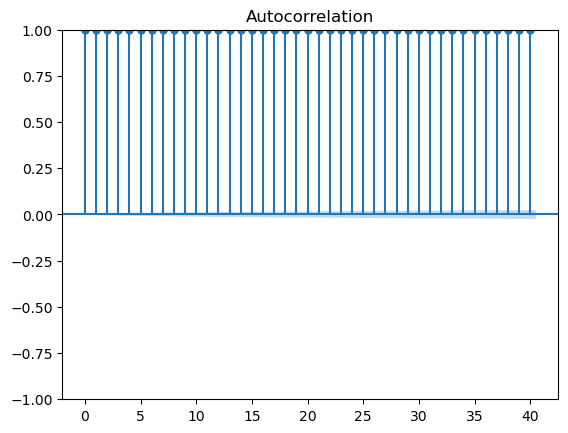

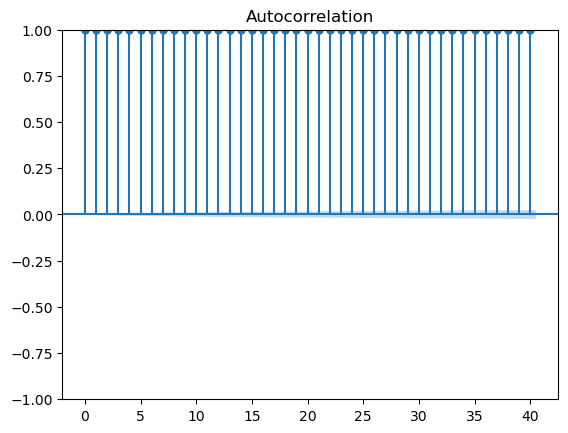

In [19]:
plot_acf(btc_price_data_1_year.close, lags = 40)

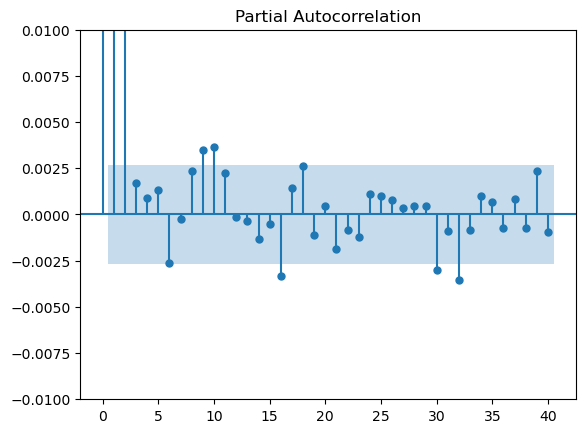

In [20]:
# Ако автокорелацията е много голяма изпозваме partial autocorrelation
# Коефициентите на корелация, които са в синята област са незначителни за модела. В тази област p-value е твърде малко/незначително. 
# Корелациите в тази област могат да бъдат и случайни
plot_pacf(btc_price_data_1_year.close, lags = 40)
plt.ylim(-0.010, 0.010)
plt.show()

Significant Lags: [ 0  1  2  6  8  9 10 16 18 30 32 39 43 46 47 56]


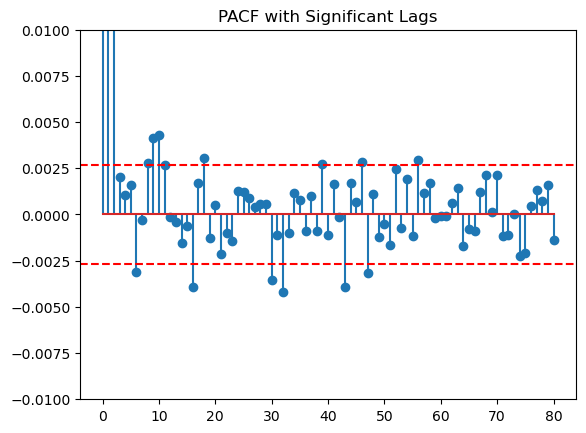

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# Example data (replace with your time series)
#data = np.random.randn(100)
data = btc_price_data_1_year['close']

# Calculate PACF
pacf_values = pacf(data, nlags=80)  # Choose number of lags you want

# Calculate the confidence interval (for 95% confidence)
conf_int = 1.96 / np.sqrt(len(data))  # The 95% confidence interval

# Get significant lags (values outside the confidence interval)
significant_lags = np.where(np.abs(pacf_values) > conf_int)[0]

# Print the significant lags
print("Significant Lags:", significant_lags)

#Optional: Plot PACF with significant lags marked
plt.stem(pacf_values)
plt.axhline(y=conf_int, color='r', linestyle='--')
plt.axhline(y=-conf_int, color='r', linestyle='--')
plt.ylim(-0.010, 0.010)
plt.title("PACF with Significant Lags")
plt.show()


In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# # ACF plot
# plot_acf(btc_price_data_1_year['close'], lags=3)
# plt.show()

# # PACF plot
# plot_pacf(btc_price_data_1_year['close'], lags=3)
# plt.show()


In [23]:
import pandas as pd

def generate_features(df, target_column, lag_features, rolling_windows, ema_spans):
    # Lag Features
    for lag in lag_features:
        df[f'lag_{lag}'] = df[target_column].shift(lag)
    
    # Rolling Features
    for window in rolling_windows:
        df[f'rolling_mean_{window}'] = df[target_column].rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df[target_column].rolling(window=window).std()
    
    # EMA Features
    for span in ema_spans:
        df[f'ema_{span}'] = df[target_column].ewm(span=span, adjust=False).mean()
    
    # Drop NaNs
    df.dropna(inplace=True)
    return df


In [24]:
lag_features = [1, 7, 30]
rolling_windows = [7, 30]
ema_spans = [12, 26]

df = generate_features(btc_price_data_1_year, target_column='close', lag_features=lag_features, rolling_windows=rolling_windows, ema_spans=ema_spans)
df

,timestamp,open,high,low,close,volume,date,time,lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,ema_12,ema_26
30,2023-11-01 00:30:00,34553.58,34576.17,34568.61,34556.04,7.295937,2023-11-01,00:30:00,34567.42,34550.22,34667.88,34554.194286,11.286551,34603.793667,35.999058,34570.358662,34593.393697
31,2023-11-01 00:31:00,34550.00,34567.70,34557.80,34563.09,8.188221,2023-11-01,00:31:00,34556.04,34566.09,34642.82,34553.765714,10.806305,34601.136000,35.961604,34569.240407,34591.148979
32,2023-11-01 00:32:00,34553.54,34574.35,34563.08,34566.10,9.122047,2023-11-01,00:32:00,34563.09,34553.49,34656.56,34555.567143,11.761519,34598.120667,34.931858,34568.757267,34589.293499
33,2023-11-01 00:33:00,34561.15,34592.49,34567.92,34589.32,8.084663,2023-11-01,00:33:00,34566.10,34533.88,34629.34,34563.487143,13.290588,34596.786667,34.459484,34571.920765,34589.295462
34,2023-11-01 00:34:00,34570.49,34601.81,34589.32,34594.41,11.506843,2023-11-01,00:34:00,34589.32,34548.61,34622.27,34570.030000,15.785379,34595.858000,34.122801,34575.380647,34589.674317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528627,2024-10-31 23:56:00,70238.76,70248.97,70248.97,70238.76,1.189134,2024-10-31,23:56:00,70248.97,70327.39,70457.97,70282.868571,36.557889,70401.843000,93.825456,70304.552491,70354.715986
528628,2024-10-31 23:57:00,70218.00,70250.00,70238.77,70233.24,4.767082,2024-10-31,23:57:00,70238.76,70325.29,70464.17,70269.718571,35.288892,70394.145333,97.919384,70293.581339,70345.717765
528629,2024-10-31 23:58:00,70193.97,70242.25,70232.55,70207.78,9.589688,2024-10-31,23:58:00,70233.24,70321.57,70513.18,70253.462857,33.590459,70383.965333,100.945834,70280.381133,70335.500152
528630,2024-10-31 23:59:00,70175.16,70207.79,70207.79,70197.83,7.112237,2024-10-31,23:59:00,70207.78,70296.69,70519.33,70239.340000,33.166642,70373.248667,103.121813,70267.680958,70325.302363


In [25]:
# Calculate autocorrelation for specific lags
significant_lags = {}
for lag in range(1, 1000):  # Check lags 1 to 40
    autocorr = btc_price_data_1_year['close'].autocorr(lag=lag)
    significant_lags[lag] = autocorr

# Filter lags with significant autocorrelation
threshold = 1.96 / (len(df) ** 0.5)
important_lags = {lag: autocorr for lag, autocorr in significant_lags.items() if abs(autocorr) > threshold}

print("Significant Lags and Autocorrelations:", important_lags)


Significant Lags and Autocorrelations: {1: 0.9999926755427301, 2: 0.9999856562330283, 3: 0.999978673419242, 4: 0.9999717267510376, 5: 0.9999648170088316, 6: 0.9999578479696805, 7: 0.9999508685062118, 8: 0.9999439442252648, 9: 0.9999371132214959, 10: 0.9999303849769207, 11: 0.9999237171392219, 12: 0.9999170451172325, 13: 0.999910355949363, 14: 0.9999036439483852, 15: 0.9998969171343164, 16: 0.9998901133902938, 17: 0.9998833436315393, 18: 0.9998766408487182, 19: 0.9998699059541809, 20: 0.999863191449995, 21: 0.9998564298488722, 22: 0.9998496578963563, 23: 0.9998428807617896, 24: 0.9998361491906819, 25: 0.9998294416945283, 26: 0.9998227484607056, 27: 0.99981606594121, 28: 0.9998093957247272, 29: 0.9998027301721842, 30: 0.9997959843979805, 31: 0.9997892242224586, 32: 0.9997823789665571, 33: 0.9997755132340916, 34: 0.9997686542941714, 35: 0.9997618078195454, 36: 0.9997549397491236, 37: 0.9997480884609526, 38: 0.9997412228857414, 39: 0.9997344188669415, 40: 0.9997276056011019, 41: 0.99972083

<Figure size 1000x600 with 0 Axes>

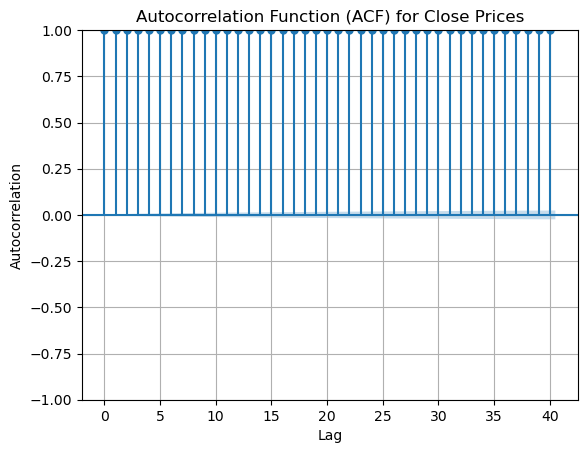

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Ensure 'close' column is treated as the target variable
target_column = 'close'

# Generate the ACF plot for 'close' prices
plt.figure(figsize=(10, 6))
plot_acf(df[target_column], lags=40)  # Analyze up to 40 lags
plt.title('Autocorrelation Function (ACF) for Close Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

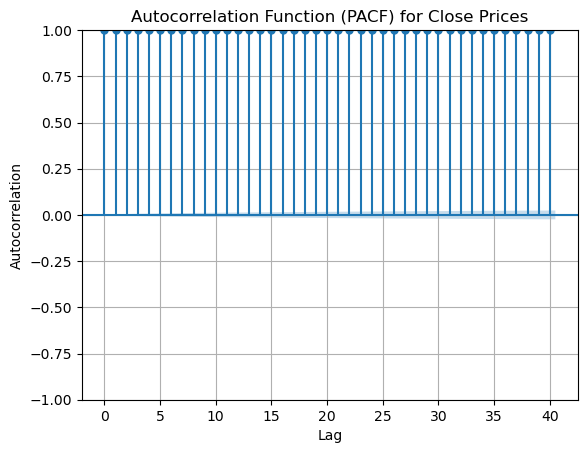

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Ensure 'close' column is treated as the target variable
target_column = 'close'

# Generate the ACF plot for 'close' prices
plt.figure(figsize=(10, 6))
plot_acf(df[target_column], lags=40)  # Analyze up to 40 lags
plt.title('Autocorrelation Function (PACF) for Close Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

In [28]:
# import pandas as pd
# import numpy as np
# #from statsmodels.stats.diagnostic import acf
# from statsmodels.tsa.stattools import acf
# import matplotlib.pyplot as plt
# from scipy import stats

# def analyze_autocorrelation(data, lags=40, alpha=0.05):
#     """
#     Analyze autocorrelation in time series data and identify significant lags.
    
#     Parameters:
#     -----------
#     data : pandas.Series or array-like
#         The time series data to analyze (Bitcoin closing prices)
#     lags : int, default=40
#         Number of lags to analyze
#     alpha : float, default=0.05
#         Significance level for confidence intervals
    
#     Returns:
#     --------
#     tuple: (significant_lags, acf_values, confidence_intervals)
#     """
#     # Calculate ACF values and confidence intervals
#     acf_values = acf(data, nlags=lags, fft=False)
    
#     # Calculate confidence intervals
#     # For 95% confidence interval, use 1.96 (assuming normal distribution)
#     conf_int = stats.norm.ppf(1 - alpha/2) / np.sqrt(len(data))
#     confidence_intervals = np.array([-conf_int, conf_int])
    
#     # Find significant lags (excluding lag 0)
#     significant_lags = []
#     for i in range(1, len(acf_values)):
#         if abs(acf_values[i]) > conf_int:
#             significant_lags.append({
#                 'lag': i,
#                 'correlation': acf_values[i],
#                 'significance': abs(acf_values[i]) / conf_int
#             })
    
#     # Sort significant lags by absolute correlation value
#     significant_lags = sorted(significant_lags, 
#                             key=lambda x: abs(x['correlation']), 
#                             reverse=True)
    
#     # Create visualization
#     plt.figure(figsize=(12, 6))
#     plt.bar(range(lags + 1), acf_values, alpha=0.5, color='blue')
#     plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
#     plt.axhline(y=conf_int, color='red', linestyle='--', alpha=0.5)
#     plt.axhline(y=-conf_int, color='red', linestyle='--', alpha=0.5)
#     plt.title('Autocorrelation Function with Confidence Intervals')
#     plt.xlabel('Lag')
#     plt.ylabel('Correlation')
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
    
#     return significant_lags, acf_values, confidence_intervals

# def print_significant_lags(significant_lags):
#     """
#     Print a formatted summary of significant lags.
#     """
#     print("\nSignificant Lags Summary:")
#     print("-" * 60)
#     print(f"{'Lag':^10} {'Correlation':^15} {'Significance Level':^20}")
#     print("-" * 60)
    
#     for lag_info in significant_lags:
#         print(f"{lag_info['lag']:^10} {lag_info['correlation']:^15.3f} {lag_info['significance']:^20.2f}")

In [29]:
# analyze_autocorrelation(btc_price_data_1_year)

In [30]:
import numpy as np
import pandas as pd
#from statsmodels.stats.diagnostic import pacf
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
from scipy import stats

def analyze_significant_pacf_lags(data, lags=40, alpha=0.05):
    """
    Analyze partial autocorrelation and identify significant lags.
    
    Parameters:
    -----------
    data : pandas.Series or array-like
        The time series data to analyze
    lags : int, default=40
        Number of lags to analyze
    alpha : float, default=0.05
        Significance level for confidence intervals
    
    Returns:
    --------
    dict: Dictionary containing significant lags and their correlations
    """
    # Calculate PACF values
    pacf_values = pacf(data, nlags=lags, method='ols')
    
    # Calculate confidence intervals
    conf_int = stats.norm.ppf(1 - alpha/2) / np.sqrt(len(data))
    
    # Find significant lags (excluding lag 0)
    significant_lags = []
    for i in range(1, len(pacf_values)):
        if abs(pacf_values[i]) > conf_int:
            significant_lags.append({
                'lag': i,
                'correlation': pacf_values[i],
                'significance': abs(pacf_values[i]) / conf_int
            })
    
    # Sort by absolute correlation value
    significant_lags = sorted(significant_lags, 
                            key=lambda x: abs(x['correlation']), 
                            reverse=True)
    
    # Visualize PACF with confidence intervals
    plt.figure(figsize=(12, 6))
    plt.bar(range(lags + 1), pacf_values, alpha=0.5, color='blue')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axhline(y=conf_int, color='red', linestyle='--', alpha=0.5, 
                label=f'{(1-alpha)*100}% Confidence Interval')
    plt.axhline(y=-conf_int, color='red', linestyle='--', alpha=0.5)
    plt.title('Partial Autocorrelation Function with Confidence Intervals')
    plt.xlabel('Lag')
    plt.ylabel('Partial Correlation')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return {
        'significant_lags': significant_lags,
        'pacf_values': pacf_values,
        'confidence_interval': conf_int
    }

def print_significant_pacf_lags(results):
    """
    Print a formatted summary of significant PACF lags.
    
    Parameters:
    -----------
    results : dict
        Results dictionary from analyze_significant_pacf_lags
    """
    significant_lags = results['significant_lags']
    
    if not significant_lags:
        print("\nNo significant lags found.")
        return
        
    print("\nSignificant PACF Lags Summary:")
    print("-" * 60)
    print(f"{'Lag':^10} {'Correlation':^15} {'Significance Level':^20}")
    print("-" * 60)
    
    for lag_info in significant_lags:
        print(f"{lag_info['lag']:^10} {lag_info['correlation']:^15.3f} "
              f"{lag_info['significance']:^20.2f}")

In [31]:
# Assuming you have your data in a pandas Series called 'data'
#results = analyze_significant_pacf_lags(btc_price_data_1_year)
#print_significant_pacf_lags(results)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# Example data (replace with your time series)
#data = np.random.randn(100)
data = btc_price_data_1_year['close']
# data = data['open', 'high', 'low', 'close', 'volume',
#        'lag_1', 'lag_7', 'lag_30', 'rolling_mean_7', 'rolling_std_7',
#        'rolling_mean_30', 'rolling_std_30', 'ema_12', 'ema_26']
# Calculate PACF
pacf_values = pacf(data, nlags=80)  # Choose number of lags you want

# Calculate the confidence interval (for 95% confidence)
conf_int = 1.96 / np.sqrt(len(data))  # The 95% confidence interval

# Get significant lags (values outside the confidence interval)
significant_lags = np.where(np.abs(pacf_values) > conf_int)[0]

# Print the significant lags
print("Significant Lags:", significant_lags)

# Optional: Plot PACF with significant lags marked
# plt.stem(pacf_values, use_line_collection=True)
# plt.axhline(y=conf_int, color='r', linestyle='--')
# plt.axhline(y=-conf_int, color='r', linestyle='--')
# plt.title("PACF with Significant Lags")
# plt.show()


Significant Lags: [ 0  1  2  6  9 10 16 18 30 32 39 43 47 52 56]


Significant Lags: [ 0  1  2  6  9 10 16 18 30 32 39]


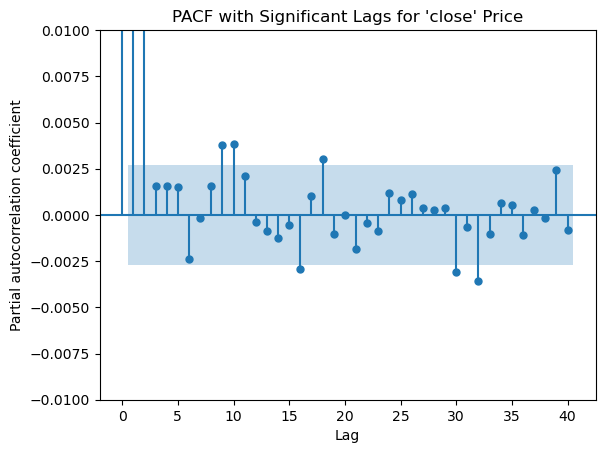

In [33]:
lags = 40
# Calculate PACF
pacf_values = pacf(btc_price_data_1_year['close'], nlags=lags)

# Calculate the confidence interval
conf_int = 1.96 / np.sqrt(len(btc_price_data_1_year['close']))  # The 95% confidence interval

# Get significant lags (values outside the confidence interval)
significant_lags = np.where(np.abs(pacf_values) > conf_int)[0]

# Print the significant lags
print("Significant Lags:", significant_lags)

plot_pacf(btc_price_data_1_year.close, lags = lags)
plt.ylim(-0.010, 0.010)

plt.xlabel('Lag')
plt.ylabel('Partial autocorrelation coefficient')
plt.title('PACF with Significant Lags for \'close\' Price')
plt.show()